In [1]:
from PIL import Image
import numpy as np
import os

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [4]:
#from elpv_reader import load_dataset
# unable to use the import from the repo, hence downloaded the data and rerun the whole function 
def load_dataset(fname=None):
    if fname is None:
        # Assume we are in the utils folder and get the absolute path to the
        # parent directory.
        fname = os.path.abspath(os.path.join(os.path.dirname('elpv/images'),
                                             os.path.pardir))
        fname = os.path.join(fname, 'elpv/labels.csv')

    data = np.genfromtxt(fname, dtype=['|S19', '<f8', '|S4'], names=[
                         'path', 'probability', 'type'])
    image_fnames = np.char.decode(data['path'])
    probs = data['probability']
    types = np.char.decode(data['type'])

    def load_cell_image(fname):
        with Image.open(fname) as image:
            return np.asarray(image)

    dir = os.path.dirname(fname)

    images = np.array([load_cell_image(os.path.join(dir, fn))
                       for fn in image_fnames])

    return images, probs, types

In [5]:
images, proba, types = load_dataset()

In [6]:
print(images.shape)
print(proba.shape)
print(types.shape)

(2624, 300, 300)
(2624,)
(2624,)


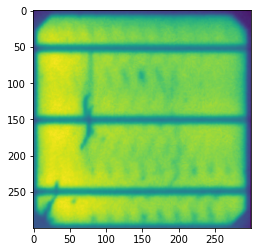

In [7]:
plt.imshow(images[0]) # print example 

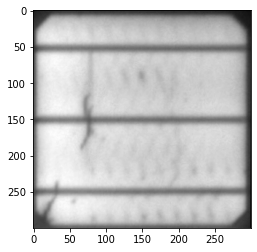

In [8]:
plt.imshow(images[0], 'gray') # print example 

In [9]:
index = list(range(2624))

In [10]:
index[-1]

2623

In [11]:
proba = proba.astype(str)
x_train, x_test, y_train, y_test = train_test_split(index, proba, test_size=0.25, stratify=proba)

In [12]:
print(x_train)

[1716, 838, 1289, 268, 1734, 1190, 186, 1328, 1691, 389, 1880, 1182, 524, 2323, 1242, 1477, 2344, 315, 1415, 2274, 809, 899, 873, 1555, 77, 26, 1706, 881, 1205, 2103, 2009, 1107, 2027, 2478, 474, 481, 1350, 1130, 1229, 2046, 1580, 1502, 592, 2176, 1981, 1524, 585, 2360, 1456, 2445, 1907, 396, 1837, 2291, 606, 884, 2132, 307, 1761, 2097, 255, 2411, 322, 434, 576, 1940, 515, 2614, 1326, 75, 2158, 2001, 295, 2224, 314, 558, 2388, 2536, 2619, 1000, 1889, 1782, 922, 324, 2089, 2029, 209, 1196, 1327, 298, 709, 657, 2066, 2021, 1876, 1462, 804, 169, 1294, 1790, 118, 910, 2436, 610, 1628, 752, 2308, 2458, 149, 1980, 2492, 670, 37, 1514, 2008, 1329, 1271, 1043, 1026, 1810, 2484, 1203, 1703, 297, 78, 949, 1962, 2205, 1717, 842, 55, 1840, 199, 332, 973, 1317, 1504, 2356, 736, 1707, 787, 2157, 1625, 1419, 650, 1795, 2192, 2307, 2287, 1941, 325, 84, 2135, 1680, 1123, 50, 780, 1232, 2078, 1756, 1724, 1728, 1362, 1763, 353, 374, 1398, 2422, 317, 2040, 2392, 2061, 1866, 293, 961, 1394, 1906, 2354, 150

In [13]:
print(y_train)

['0.0' '0.0' '0.0' ... '0.3333333333333333' '0.0' '0.3333333333333333']


In [14]:
from collections import Counter
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_test).items()))

[('0.0', 1131), ('0.3333333333333333', 221), ('0.6666666666666666', 80), ('1.0', 536)]
[('0.0', 377), ('0.3333333333333333', 74), ('0.6666666666666666', 26), ('1.0', 179)]


# train the model with the original data without preprocessing

In [15]:
# prepare trainig and testing set based on split 
x_train_img = []
x_test_img  = []
# prepare testing set based on Mono and Poly type 
x_test_mono = []
x_test_poly = []
y_test_mono = []
y_test_poly = []

for i in x_train:
    x_train_img.append(images[i])

for i in x_test:
    x_test_img.append(images[i])
    
    if types[i] == 'mono':
        x_test_mono.append(images[i])
        y_test_mono.append(proba[i])
    if types[i] == 'poly':
        x_test_poly.append(images[i])
        y_test_poly.append(proba[i])

In [16]:
x_train_orig = np.array(x_train_img)
x_test_orig  = np.array(x_test_img)

x_test_mono = np.array(x_test_mono)
x_test_poly = np.array(x_test_poly)
y_test_mono = np.array(y_test_mono)
y_test_poly = np.array(y_test_poly)

In [17]:
x_train_orig.shape

(1968, 300, 300)

In [18]:
#flattened the image samples
def reshape_data(input):
    volume, width , hight = input.shape
    reshaped_set = input.reshape(volume, width *  hight)
    return reshaped_set

In [19]:
x_train_reshape = reshape_data(x_train_orig)
x_test_reshape = reshape_data(x_test_orig)
x_test_mono_reshape = reshape_data(x_test_mono)
x_test_poly_reshape = reshape_data(x_test_poly)
print(x_train_reshape.shape)
print(x_test_reshape.shape)
print(x_test_mono_reshape.shape)
print(x_test_poly_reshape.shape)

(1968, 90000)
(656, 90000)
(272, 90000)
(384, 90000)


### SGD Classifier

In [20]:
# set max_iter =250 based on requirement
sgd_classifier = SGDClassifier(max_iter = 250)
sgd_classifier.fit(x_train_reshape, y_train)
sgd_predict = sgd_classifier.predict(x_test_reshape)
sgd_result = metrics.classification_report(y_test, sgd_predict)
sgd_confusion_matrix = metrics.confusion_matrix(y_test, sgd_predict)
print(sgd_result)
print("sgd_confusion_matrix")
print(sgd_confusion_matrix)

                    precision    recall  f1-score   support

               0.0       0.65      0.97      0.78       377
0.3333333333333333       0.20      0.01      0.03        74
0.6666666666666666       0.00      0.00      0.00        26
               1.0       0.86      0.40      0.55       179

          accuracy                           0.67       656
         macro avg       0.43      0.35      0.34       656
      weighted avg       0.63      0.67      0.60       656

sgd_confusion_matrix
[[367   0   0  10]
 [ 71   1   0   2]
 [ 26   0   0   0]
 [103   4   0  72]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
sgd_predict_mono = sgd_classifier.predict(x_test_mono_reshape)
sgd_result_mono = metrics.classification_report(y_test_mono, sgd_predict_mono)
sgd_confusion_matrix_mono = metrics.confusion_matrix(y_test_mono, sgd_predict_mono)
print(sgd_result_mono)
print("sgd_confusion_matrix_mono")
print(sgd_confusion_matrix_mono)

                    precision    recall  f1-score   support

               0.0       0.66      0.97      0.79       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.00      0.00      0.00        14
               1.0       0.90      0.59      0.71        78

          accuracy                           0.71       272
         macro avg       0.39      0.39      0.38       272
      weighted avg       0.62      0.71      0.64       272

sgd_confusion_matrix_mono
[[146   0   0   4]
 [ 29   0   0   1]
 [ 14   0   0   0]
 [ 31   1   0  46]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
sgd_predict_poly = sgd_classifier.predict(x_test_poly_reshape)
sgd_result_poly = metrics.classification_report(y_test_poly, sgd_predict_poly)
sgd_confusion_matrix_poly = metrics.confusion_matrix(y_test_poly, sgd_predict_poly)
print(sgd_result_poly)
print("sgd_confusion_matrix_poly")
print(sgd_confusion_matrix_poly)

                    precision    recall  f1-score   support

               0.0       0.64      0.97      0.77       227
0.3333333333333333       0.25      0.02      0.04        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.79      0.26      0.39       101

          accuracy                           0.65       384
         macro avg       0.42      0.31      0.30       384
      weighted avg       0.61      0.65      0.56       384

sgd_confusion_matrix_poly
[[221   0   0   6]
 [ 42   1   0   1]
 [ 12   0   0   0]
 [ 72   3   0  26]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


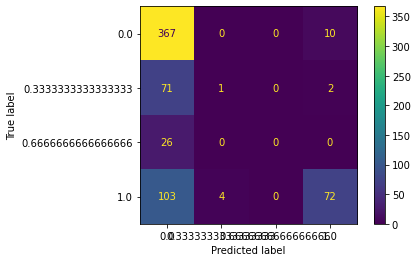

In [23]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, sgd_predict)

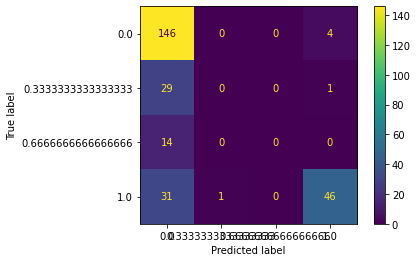

In [24]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, sgd_predict_mono)

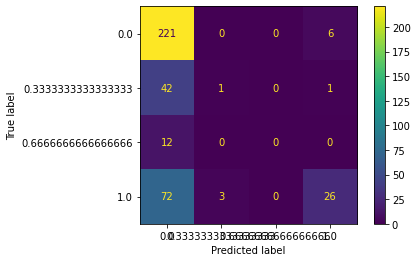

In [25]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, sgd_predict_poly)

### DT Classifier

In [26]:
# no prameter need to be included based on requirement
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_reshape, y_train)
dt_predict = dt_classifier.predict(x_test_reshape)
dt_result = metrics.classification_report(y_test, dt_predict)
dt_confusion_matrix = metrics.confusion_matrix(y_test, dt_predict)
print(dt_result)
print("dt_confusion_matrix")
print(dt_confusion_matrix)

                    precision    recall  f1-score   support

               0.0       0.71      0.69      0.70       377
0.3333333333333333       0.23      0.24      0.24        74
0.6666666666666666       0.11      0.19      0.14        26
               1.0       0.52      0.47      0.50       179

          accuracy                           0.56       656
         macro avg       0.39      0.40      0.39       656
      weighted avg       0.58      0.56      0.57       656

dt_confusion_matrix
[[261  34  24  58]
 [ 34  18   5  17]
 [ 12   6   5   3]
 [ 63  19  12  85]]


In [27]:
dt_predict_mono = dt_classifier.predict(x_test_mono_reshape)
dt_result_mono = metrics.classification_report(y_test_mono, dt_predict_mono)
dt_confusion_matrix_mono = metrics.confusion_matrix(y_test_mono, dt_predict_mono)
print(dt_result_mono)
print("dt_confusion_matrix_mono")
print(dt_confusion_matrix_mono)

                    precision    recall  f1-score   support

               0.0       0.67      0.65      0.66       150
0.3333333333333333       0.16      0.20      0.18        30
0.6666666666666666       0.12      0.21      0.15        14
               1.0       0.62      0.51      0.56        78

          accuracy                           0.54       272
         macro avg       0.39      0.40      0.39       272
      weighted avg       0.57      0.54      0.55       272

dt_confusion_matrix_mono
[[98 19 16 17]
 [16  6  2  6]
 [ 8  2  3  1]
 [24 10  4 40]]


In [28]:
dt_predict_poly = dt_classifier.predict(x_test_poly_reshape)
dt_result_poly = metrics.classification_report(y_test_poly, dt_predict_poly)
dt_confusion_matrix_poly = metrics.confusion_matrix(y_test_poly, dt_predict_poly)
print(dt_result_poly)
print("dt_confusion_matrix_poly")
print(dt_confusion_matrix_poly)

                    precision    recall  f1-score   support

               0.0       0.73      0.72      0.72       227
0.3333333333333333       0.30      0.27      0.29        44
0.6666666666666666       0.10      0.17      0.12        12
               1.0       0.45      0.45      0.45       101

          accuracy                           0.58       384
         macro avg       0.39      0.40      0.39       384
      weighted avg       0.59      0.58      0.58       384

dt_confusion_matrix_poly
[[163  15   8  41]
 [ 18  12   3  11]
 [  4   4   2   2]
 [ 39   9   8  45]]


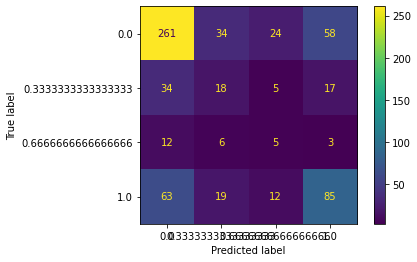

In [29]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, dt_predict)

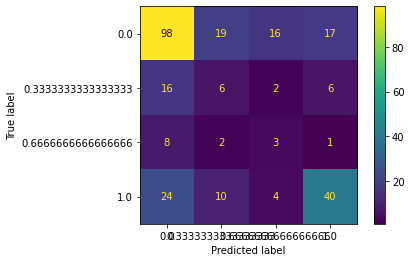

In [30]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, dt_predict_mono)

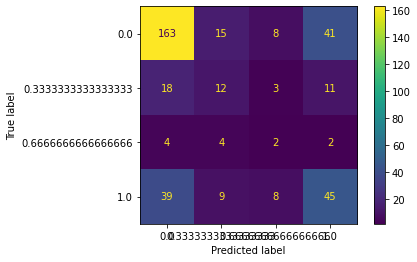

In [31]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, dt_predict_poly)

### KNN Classifier

In [32]:
# set neighbors = 3 based on requirement
knn_classifier = KNeighborsClassifier(n_neighbors = 3) 
# fit the model to the training data 
knn_classifier.fit(x_train_reshape, y_train)
# evaluate the testing data with fitted model
knn_predict = knn_classifier.predict(x_test_reshape)
# generate report - include accuracy, precision, recall, and the F1-score
knn_result = metrics.classification_report(y_test, knn_predict)
# generate the confusion metrics to summarise the errors for each class
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_predict)
print(knn_result)
print("knn_confusion_matrix")
print(knn_confusion_matrix)

                    precision    recall  f1-score   support

               0.0       0.69      0.85      0.76       377
0.3333333333333333       0.46      0.35      0.40        74
0.6666666666666666       0.00      0.00      0.00        26
               1.0       0.66      0.49      0.56       179

          accuracy                           0.66       656
         macro avg       0.45      0.42      0.43       656
      weighted avg       0.63      0.66      0.63       656

knn_confusion_matrix
[[319  20   4  34]
 [ 43  26   0   5]
 [ 17   4   0   5]
 [ 84   7   1  87]]


In [33]:
knn_predict_mono = knn_classifier.predict(x_test_mono_reshape)
knn_result_mono = metrics.classification_report(y_test_mono, knn_predict_mono)
knn_confusion_matrix_mono = metrics.confusion_matrix(y_test_mono, knn_predict_mono)
print(knn_result_mono)
print("knn_confusion_matrix_mono")
print(knn_confusion_matrix_mono)

                    precision    recall  f1-score   support

               0.0       0.70      0.83      0.76       150
0.3333333333333333       0.28      0.23      0.25        30
0.6666666666666666       0.00      0.00      0.00        14
               1.0       0.72      0.60      0.66        78

          accuracy                           0.65       272
         macro avg       0.42      0.42      0.42       272
      weighted avg       0.62      0.65      0.63       272

knn_confusion_matrix_mono
[[124  11   3  12]
 [ 20   7   0   3]
 [  7   4   0   3]
 [ 27   3   1  47]]


In [34]:
knn_predict_poly = knn_classifier.predict(x_test_poly_reshape)
knn_result_poly = metrics.classification_report(y_test_poly, knn_predict_poly)
knn_confusion_matrix_poly = metrics.confusion_matrix(y_test_poly, knn_predict_poly)
print(knn_result_poly)
print("knn_confusion_matrix_poly")
print(knn_confusion_matrix_poly)

                    precision    recall  f1-score   support

               0.0       0.68      0.86      0.76       227
0.3333333333333333       0.59      0.43      0.50        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.61      0.40      0.48       101

          accuracy                           0.66       384
         macro avg       0.47      0.42      0.44       384
      weighted avg       0.63      0.66      0.63       384

knn_confusion_matrix_poly
[[195   9   1  22]
 [ 23  19   0   2]
 [ 10   0   0   2]
 [ 57   4   0  40]]


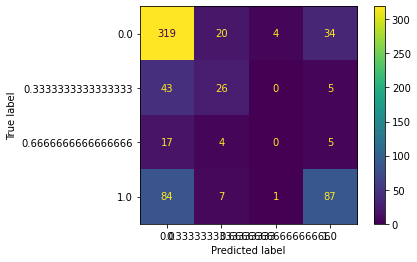

In [35]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, knn_predict)

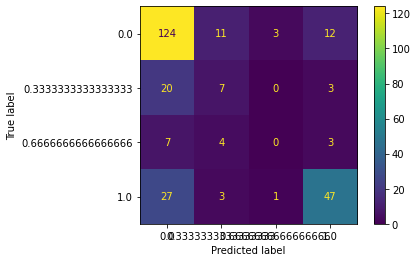

In [36]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, knn_predict_mono)

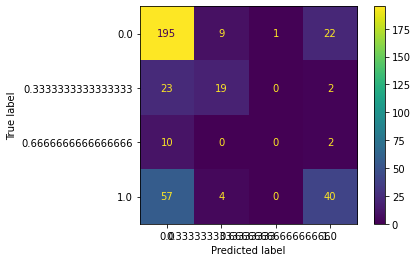

In [37]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, knn_predict_poly)

### GNB Classifier

In [38]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train_reshape, y_train)
gnb_predict = gnb_classifier.predict(x_test_reshape)
gnb_result = metrics.classification_report(y_test, gnb_predict)
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_predict)
print(gnb_result)
print("gnb_confusion_matrix")
print(gnb_confusion_matrix)

                    precision    recall  f1-score   support

               0.0       0.74      0.57      0.64       377
0.3333333333333333       0.30      0.19      0.23        74
0.6666666666666666       0.07      0.42      0.12        26
               1.0       0.59      0.53      0.56       179

          accuracy                           0.51       656
         macro avg       0.42      0.43      0.39       656
      weighted avg       0.62      0.51      0.55       656

gnb_confusion_matrix
[[214  19  95  49]
 [ 32  14  15  13]
 [  9   3  11   3]
 [ 35  11  38  95]]


In [39]:
gnb_predict_mono = gnb_classifier.predict(x_test_mono_reshape)
gnb_result_mono = metrics.classification_report(y_test_mono, gnb_predict_mono)
gnb_confusion_matrix_mono = metrics.confusion_matrix(y_test_mono, gnb_predict_mono)
print(gnb_result_mono)
print("gnb_confusion_matrix_mono")
print(gnb_confusion_matrix_mono)

                    precision    recall  f1-score   support

               0.0       0.72      0.64      0.68       150
0.3333333333333333       0.20      0.03      0.06        30
0.6666666666666666       0.09      0.50      0.15        14
               1.0       0.75      0.51      0.61        78

          accuracy                           0.53       272
         macro avg       0.44      0.42      0.37       272
      weighted avg       0.64      0.53      0.56       272

gnb_confusion_matrix_mono
[[96  0 46  8]
 [21  1  3  5]
 [ 6  1  7  0]
 [11  3 24 40]]


In [40]:
gnb_predict_poly = gnb_classifier.predict(x_test_poly_reshape)
gnb_result_poly = metrics.classification_report(y_test_poly, gnb_predict_poly)
gnb_confusion_matrix_poly = metrics.confusion_matrix(y_test_poly, gnb_predict_poly)
print(gnb_result_poly)
print("gnb_confusion_matrix_poly")
print(gnb_confusion_matrix_poly)

                    precision    recall  f1-score   support

               0.0       0.76      0.52      0.62       227
0.3333333333333333       0.31      0.30      0.30        44
0.6666666666666666       0.05      0.33      0.09        12
               1.0       0.51      0.54      0.53       101

          accuracy                           0.49       384
         macro avg       0.41      0.42      0.38       384
      weighted avg       0.62      0.49      0.54       384

gnb_confusion_matrix_poly
[[118  19  49  41]
 [ 11  13  12   8]
 [  3   2   4   3]
 [ 24   8  14  55]]


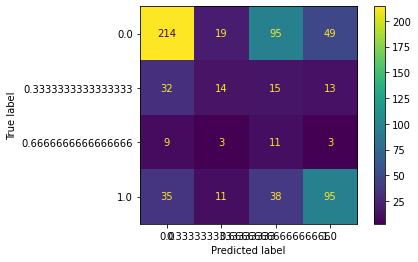

In [41]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, gnb_predict)

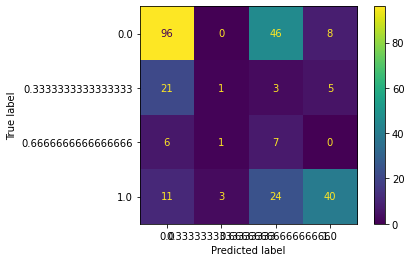

In [42]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, gnb_predict_mono)

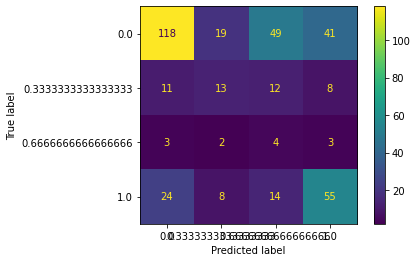

In [43]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, gnb_predict_poly)

### MNB Classifier

In [44]:
mnb_classifier = MultinomialNB()
mnb_classifier.fit(x_train_reshape, y_train)
mnb_predict = mnb_classifier.predict(x_test_reshape)
mnb_result = metrics.classification_report(y_test, mnb_predict)
mnb_confusion_matrix = metrics.confusion_matrix(y_test, mnb_predict)
print(mnb_result)
print("mnb_confusion_matrix")
print(mnb_confusion_matrix)

                    precision    recall  f1-score   support

               0.0       0.72      0.38      0.50       377
0.3333333333333333       0.18      0.35      0.24        74
0.6666666666666666       0.07      0.54      0.12        26
               1.0       0.62      0.37      0.46       179

          accuracy                           0.38       656
         macro avg       0.40      0.41      0.33       656
      weighted avg       0.61      0.38      0.45       656

mnb_confusion_matrix
[[144  88 116  29]
 [ 17  26  24   7]
 [  3   5  14   4]
 [ 36  24  53  66]]


In [45]:
mnb_predict_mono = mnb_classifier.predict(x_test_mono_reshape)
mnb_result_mono = metrics.classification_report(y_test_mono, mnb_predict_mono)
mnb_confusion_matrix_mono = metrics.confusion_matrix(y_test_mono, mnb_predict_mono)
print(mnb_result_mono)
print("mnb_confusion_matrix_mono")
print(mnb_confusion_matrix_mono)

                    precision    recall  f1-score   support

               0.0       0.71      0.23      0.34       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.07      0.93      0.14        14
               1.0       0.72      0.40      0.51        78

          accuracy                           0.29       272
         macro avg       0.38      0.39      0.25       272
      weighted avg       0.60      0.29      0.34       272

mnb_confusion_matrix_mono
[[ 34   0 107   9]
 [  7   0  20   3]
 [  0   1  13   0]
 [  7   5  35  31]]


In [46]:
mnb_predict_poly = mnb_classifier.predict(x_test_poly_reshape)
mnb_result_poly = metrics.classification_report(y_test_poly, mnb_predict_poly)
mnb_confusion_matrix_poly = metrics.confusion_matrix(y_test_poly, mnb_predict_poly)
print(mnb_result_poly)
print("mnb_confusion_matrix_poly")
print(mnb_confusion_matrix_poly)

                    precision    recall  f1-score   support

               0.0       0.72      0.48      0.58       227
0.3333333333333333       0.19      0.59      0.29        44
0.6666666666666666       0.03      0.08      0.05        12
               1.0       0.56      0.35      0.43       101

          accuracy                           0.45       384
         macro avg       0.38      0.38      0.34       384
      weighted avg       0.60      0.45      0.49       384

mnb_confusion_matrix_poly
[[110  88   9  20]
 [ 10  26   4   4]
 [  3   4   1   4]
 [ 29  19  18  35]]


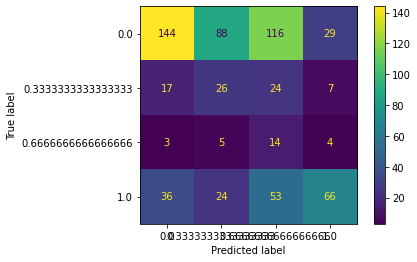

In [47]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, mnb_predict)

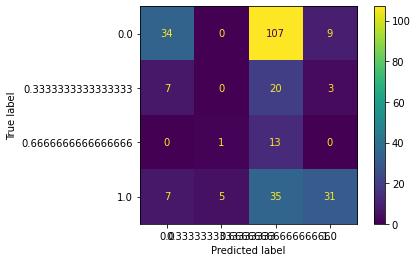

In [48]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, mnb_predict_mono)

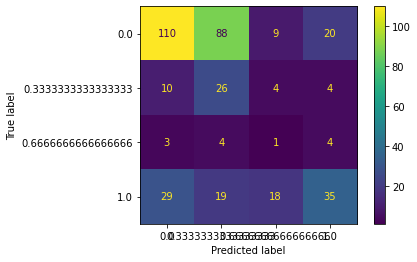

In [49]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, mnb_predict_poly)

### BNB Classifier

In [50]:
bnb_classifier = BernoulliNB()
bnb_classifier.fit(x_train_reshape, y_train)
bnb_predict = bnb_classifier.predict(x_test_reshape)
bnb_result = metrics.classification_report(y_test, bnb_predict)
bnb_confusion_matrix = metrics.confusion_matrix(y_test, bnb_predict)
print(bnb_result)
print("bnb_confusion_matrix")
print(bnb_confusion_matrix)

                    precision    recall  f1-score   support

               0.0       0.58      0.99      0.73       377
0.3333333333333333       0.00      0.00      0.00        74
0.6666666666666666       0.00      0.00      0.00        26
               1.0       0.50      0.02      0.04       179

          accuracy                           0.57       656
         macro avg       0.27      0.25      0.19       656
      weighted avg       0.47      0.57      0.43       656

bnb_confusion_matrix
[[373   0   0   4]
 [ 74   0   0   0]
 [ 26   0   0   0]
 [175   0   0   4]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
bnb_predict_mono = bnb_classifier.predict(x_test_mono_reshape)
bnb_result_mono = metrics.classification_report(y_test_mono, bnb_predict_mono)
bnb_confusion_matrix_mono = metrics.confusion_matrix(y_test_mono, bnb_predict_mono)
print(bnb_result_mono)
print("bnb_confusion_matrix_mono")
print(bnb_confusion_matrix_mono)

                    precision    recall  f1-score   support

               0.0       0.56      1.00      0.71       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.00      0.00      0.00        14
               1.0       1.00      0.03      0.05        78

          accuracy                           0.56       272
         macro avg       0.39      0.26      0.19       272
      weighted avg       0.59      0.56      0.41       272

bnb_confusion_matrix_mono
[[150   0   0   0]
 [ 30   0   0   0]
 [ 14   0   0   0]
 [ 76   0   0   2]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
bnb_predict_poly = bnb_classifier.predict(x_test_poly_reshape)
bnb_result_poly = metrics.classification_report(y_test_poly, bnb_predict_poly)
bnb_confusion_matrix_poly = metrics.confusion_matrix(y_test_poly, bnb_predict_poly)
print(bnb_result_poly)
print("bnb_confusion_matrix_poly")
print(bnb_confusion_matrix_poly)

                    precision    recall  f1-score   support

               0.0       0.59      0.98      0.74       227
0.3333333333333333       0.00      0.00      0.00        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.33      0.02      0.04       101

          accuracy                           0.59       384
         macro avg       0.23      0.25      0.19       384
      weighted avg       0.44      0.59      0.45       384

bnb_confusion_matrix_poly
[[223   0   0   4]
 [ 44   0   0   0]
 [ 12   0   0   0]
 [ 99   0   0   2]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


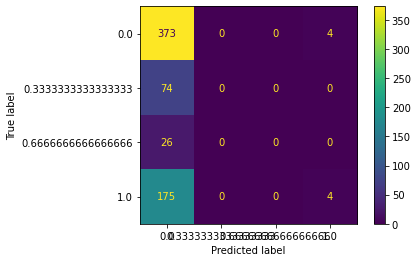

In [53]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, bnb_predict)

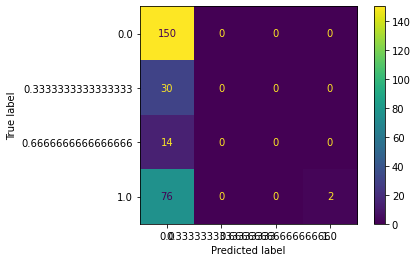

In [54]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, bnb_predict_mono)

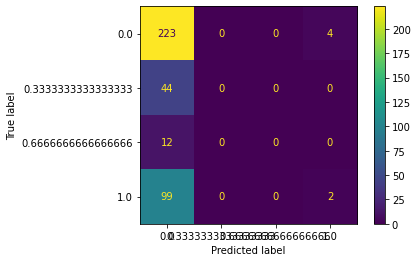

In [55]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, bnb_predict_poly)

### CNN Classifier

In [56]:
clf = MLPClassifier(solver='lbfgs', max_iter=100, alpha=1e-5, verbose=10, hidden_layer_sizes=(40, 10), random_state=1)
clf.fit(x_train_reshape, y_train)
clf_predict = clf.predict(x_test_reshape)
clf_result = metrics.classification_report(y_test, clf_predict)
clf_confusion_matrix = metrics.confusion_matrix(y_test, clf_predict)
print(clf_result)
print("clf_confusion_matrix")
print(clf_confusion_matrix)

C:\Users\Anton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                    precision    recall  f1-score   support

               0.0       0.57      1.00      0.73       377
0.3333333333333333       0.00      0.00      0.00        74
0.6666666666666666       0.00      0.00      0.00        26
               1.0       0.00      0.00      0.00       179

          accuracy                           0.57       656
         macro avg       0.14      0.25      0.18       656
      weighted avg       0.33      0.57      0.42       656

clf_confusion_matrix
[[377   0   0   0]
 [ 74   0   0   0]
 [ 26   0   0   0]
 [179   0   0   0]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
clf_predict_mono = clf.predict(x_test_mono_reshape)
clf_result_mono = metrics.classification_report(y_test_mono, clf_predict_mono)
clf_confusion_matrix_mono = metrics.confusion_matrix(y_test_mono, clf_predict_mono)
print(clf_result_mono)
print("clf_confusion_matrix_mono")
print(clf_confusion_matrix_mono)

                    precision    recall  f1-score   support

               0.0       0.55      1.00      0.71       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.00      0.00      0.00        14
               1.0       0.00      0.00      0.00        78

          accuracy                           0.55       272
         macro avg       0.14      0.25      0.18       272
      weighted avg       0.30      0.55      0.39       272

clf_confusion_matrix_mono
[[150   0   0   0]
 [ 30   0   0   0]
 [ 14   0   0   0]
 [ 78   0   0   0]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
clf_predict_poly = clf.predict(x_test_poly_reshape)
clf_result_poly = metrics.classification_report(y_test_poly, clf_predict_poly)
clf_confusion_matrix_poly = metrics.confusion_matrix(y_test_poly, clf_predict_poly)
print(clf_result_poly)
print("clf_confusion_matrix_poly")
print(clf_confusion_matrix_poly)

                    precision    recall  f1-score   support

               0.0       0.59      1.00      0.74       227
0.3333333333333333       0.00      0.00      0.00        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.00      0.00      0.00       101

          accuracy                           0.59       384
         macro avg       0.15      0.25      0.19       384
      weighted avg       0.35      0.59      0.44       384

clf_confusion_matrix_poly
[[227   0   0   0]
 [ 44   0   0   0]
 [ 12   0   0   0]
 [101   0   0   0]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


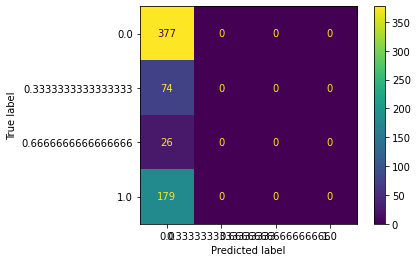

In [59]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, clf_predict)

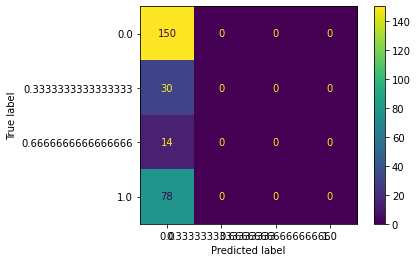

In [60]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, clf_predict_mono)

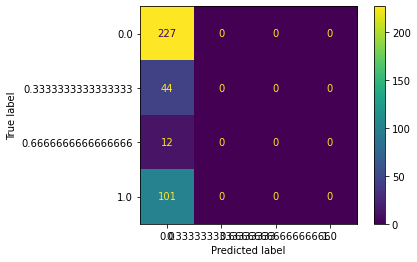

In [61]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, clf_predict_poly)

###  SVM Classifier

In [62]:
svm_clf = svm.SVC(decision_function_shape='ovr')
svm_clf.fit(x_train_reshape, y_train)
svm_predict = svm_clf.predict(x_test_reshape)
svm_result = metrics.classification_report(y_test, svm_predict)
svm_confusion_matrix = metrics.confusion_matrix(y_test, svm_predict)
print(svm_result)
print("svm_confusion_matrix")
print(svm_confusion_matrix)

                    precision    recall  f1-score   support

               0.0       0.69      0.92      0.79       377
0.3333333333333333       0.00      0.00      0.00        74
0.6666666666666666       0.00      0.00      0.00        26
               1.0       0.71      0.63      0.67       179

          accuracy                           0.70       656
         macro avg       0.35      0.39      0.36       656
      weighted avg       0.59      0.70      0.63       656

svm_confusion_matrix
[[345   0   0  32]
 [ 64   0   0  10]
 [ 23   0   0   3]
 [ 67   0   0 112]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
svm_predict_mono = svm_clf.predict(x_test_mono_reshape)
svm_result_mono = metrics.classification_report(y_test_mono, svm_predict_mono)
svm_confusion_matrix_mono = metrics.confusion_matrix(y_test_mono, svm_predict_mono)
print(svm_result_mono)
print("svm_confusion_matrix_mono")
print(svm_confusion_matrix_mono)

                    precision    recall  f1-score   support

               0.0       0.70      0.97      0.81       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.00      0.00      0.00        14
               1.0       0.89      0.71      0.79        78

          accuracy                           0.74       272
         macro avg       0.40      0.42      0.40       272
      weighted avg       0.64      0.74      0.67       272

svm_confusion_matrix_mono
[[146   0   0   4]
 [ 27   0   0   3]
 [ 14   0   0   0]
 [ 23   0   0  55]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
svm_predict_poly = svm_clf.predict(x_test_poly_reshape)
svm_result_poly = metrics.classification_report(y_test_poly, svm_predict_poly)
svm_confusion_matrix_poly = metrics.confusion_matrix(y_test_poly, svm_predict_poly)
print(svm_result_poly)
print("svm_confusion_matrix_poly")
print(svm_confusion_matrix_poly)

                    precision    recall  f1-score   support

               0.0       0.69      0.88      0.77       227
0.3333333333333333       0.00      0.00      0.00        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.60      0.56      0.58       101

          accuracy                           0.67       384
         macro avg       0.32      0.36      0.34       384
      weighted avg       0.56      0.67      0.61       384

svm_confusion_matrix_poly
[[199   0   0  28]
 [ 37   0   0   7]
 [  9   0   0   3]
 [ 44   0   0  57]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


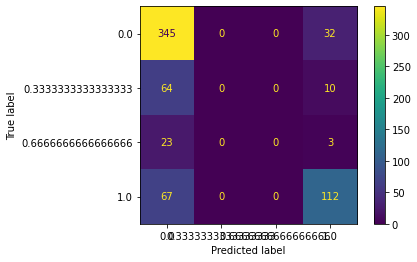

In [65]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svm_predict)

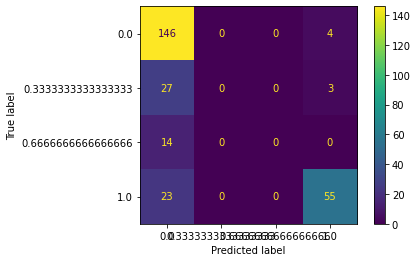

In [66]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, svm_predict_mono)

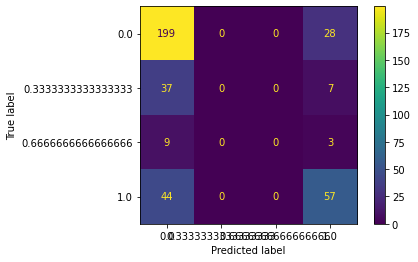

In [67]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, svm_predict_poly)

# train the model with preprocessing - Laplacian 

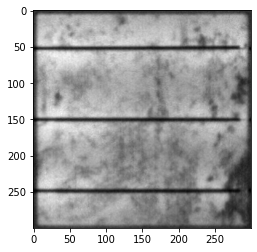

In [68]:
plt.imshow(x_train_orig[0], 'gray')

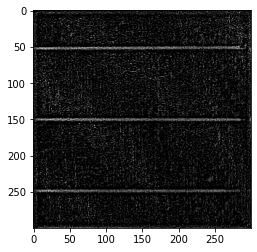

In [69]:
kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
img = cv2.filter2D(x_train_orig[0], -1, kernel)
plt.imshow(img, 'gray')

In [70]:
x_train_edge = []
for i in range(len(x_train_orig)):
    img = cv2.filter2D(x_train_orig[i], -1, kernel)
    x_train_edge.append(img)

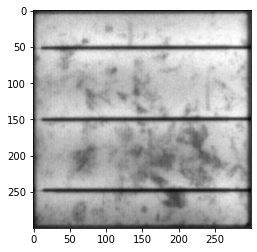

In [71]:
plt.imshow(x_train_orig[10], 'gray')

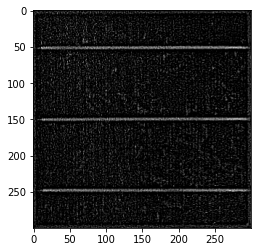

In [72]:
plt.imshow(x_train_edge[10], 'gray')

In [73]:
x_test_edge = []
for i in range(len(x_test_orig)):
    img = cv2.filter2D(x_test_orig[i], -1, kernel)
    x_test_edge.append(img)

In [74]:
x_test_mono_edge = []
for i in range(len(x_test_mono)):
    img = cv2.filter2D(x_test_mono[i], -1, kernel)
    x_test_mono_edge.append(img)

In [75]:
x_test_poly_edge = []
for i in range(len(x_test_poly)):
    img = cv2.filter2D(x_test_poly[i], -1, kernel)
    x_test_poly_edge.append(img)

In [76]:
x_train_edge = np.array(x_train_edge)
x_test_edge  = np.array(x_test_edge)

In [77]:
x_test_mono_edge = np.array(x_test_mono_edge)
x_test_poly_edge = np.array(x_test_poly_edge)

In [78]:
x_train_reshape_edge = reshape_data(x_train_edge)
x_test_reshape_edge = reshape_data(x_test_edge)
print(x_train_reshape_edge.shape)
print(x_test_reshape_edge.shape)

(1968, 90000)
(656, 90000)


In [79]:
x_test_mono_reshape_edge = reshape_data(x_test_mono_edge)
x_test_poly_reshape_edge = reshape_data(x_test_poly_edge)
print(x_test_mono_reshape_edge.shape)
print(x_test_poly_reshape_edge.shape)

(272, 90000)
(384, 90000)


In [80]:
svm_clf1 = svm.SVC(decision_function_shape='ovr')
svm_clf1.fit(x_train_reshape_edge, y_train)
svm_predict1 = svm_clf1.predict(x_test_reshape_edge)
svm_result1 = metrics.classification_report(y_test, svm_predict1)
svm_confusion_matrix1 = metrics.confusion_matrix(y_test, svm_predict1)
print(svm_result1)
print("svm_confusion_matrix1")
print(svm_confusion_matrix1)

                    precision    recall  f1-score   support

               0.0       0.66      0.90      0.76       377
0.3333333333333333       0.00      0.00      0.00        74
0.6666666666666666       0.00      0.00      0.00        26
               1.0       0.64      0.51      0.57       179

          accuracy                           0.66       656
         macro avg       0.33      0.35      0.33       656
      weighted avg       0.55      0.66      0.59       656

svm_confusion_matrix1
[[339   0   0  38]
 [ 65   0   0   9]
 [ 21   0   0   5]
 [ 87   0   0  92]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
svm_predict_mono1 = svm_clf1.predict(x_test_mono_reshape_edge)
svm_result_mono1 = metrics.classification_report(y_test_mono, svm_predict_mono1)
svm_confusion_matrix_mono1 = metrics.confusion_matrix(y_test_mono, svm_predict_mono1)
print(svm_result_mono1)
print("svm_confusion_matrix_mono1")
print(svm_confusion_matrix_mono1)

                    precision    recall  f1-score   support

               0.0       0.69      0.97      0.80       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.00      0.00      0.00        14
               1.0       0.89      0.69      0.78        78

          accuracy                           0.73       272
         macro avg       0.39      0.41      0.40       272
      weighted avg       0.63      0.73      0.67       272

svm_confusion_matrix_mono1
[[145   0   0   5]
 [ 29   0   0   1]
 [ 13   0   0   1]
 [ 24   0   0  54]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
svm_predict_poly1 = svm_clf1.predict(x_test_poly_reshape_edge)
svm_result_poly1 = metrics.classification_report(y_test_poly, svm_predict_poly1)
svm_confusion_matrix_poly1 = metrics.confusion_matrix(y_test_poly, svm_predict_poly1)
print(svm_result_poly1)
print("svm_confusion_matrix_poly1")
print(svm_confusion_matrix_poly1)

                    precision    recall  f1-score   support

               0.0       0.64      0.85      0.73       227
0.3333333333333333       0.00      0.00      0.00        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.46      0.38      0.41       101

          accuracy                           0.60       384
         macro avg       0.28      0.31      0.29       384
      weighted avg       0.50      0.60      0.54       384

svm_confusion_matrix_poly1
[[194   0   0  33]
 [ 36   0   0   8]
 [  8   0   0   4]
 [ 63   0   0  38]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


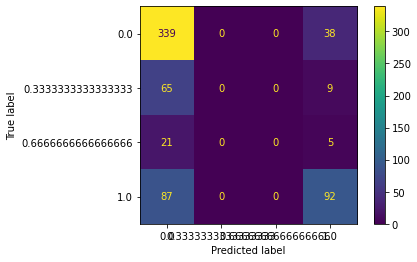

In [83]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svm_predict1)

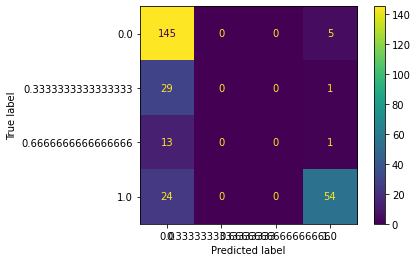

In [84]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, svm_predict_mono1)

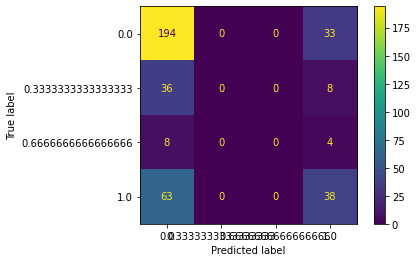

In [85]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, svm_predict_poly1)

# train the model with preprocessing - thresholding

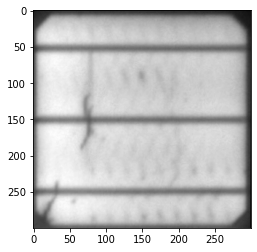

In [86]:
plt.imshow(images[0], 'gray')

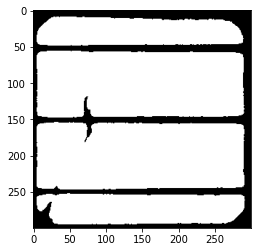

In [87]:
# threhold example on MONO type 
ret, th = cv2.threshold(images[0],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th, 'gray')

In [88]:
image_th = []
for i in range(len(images)):
    ret, th = cv2.threshold(images[i],200,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    image_th.append(th)

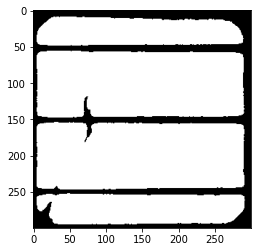

In [89]:
plt.imshow(image_th[0], 'gray')

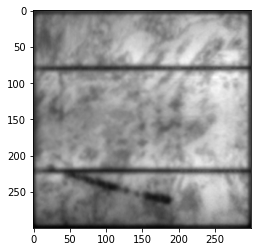

In [90]:
plt.imshow(images[114], 'gray')

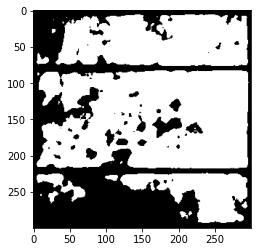

In [91]:
plt.imshow(image_th[114], 'gray')

In [92]:
image_th1 = []
for i in range(len(images)):
    ret1, th1 = cv2.threshold(images[i],80,255,cv2.THRESH_TOZERO)
    image_th1.append(th1)

In [93]:
image_th_2 = []
for i in range(len(images)):
    if types[i] == 'mono':
        image_th_2.append(image_th[i])
    if types[i] == 'poly':
        image_th_2.append(image_th1[i])

In [94]:
image_th_final = []
for i in range(len(images)):
    ret, th = cv2.threshold(image_th_2[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    image_th_final.append(th)

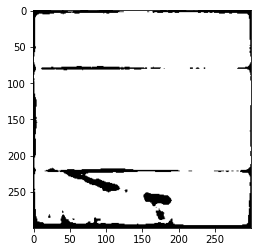

In [95]:
plt.imshow(image_th_final[114], 'gray')

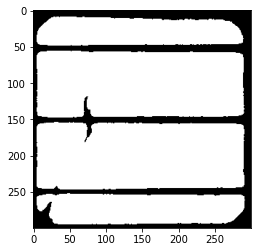

In [96]:
plt.imshow(image_th_final[0], 'gray')

In [97]:
# prepare trainig and testing set based on split 
x_train_img_th = []
x_test_img_th  = []
# prepare testing set based on Mono and Poly type 
x_test_mono_th = []
x_test_poly_th = []
y_test_mono_th = []
y_test_poly_th = []

for i in x_train:
    x_train_img_th.append(image_th_final[i])

for i in x_test:
    x_test_img_th.append(image_th_final[i])
    
    if types[i] == 'mono':
        x_test_mono_th.append(image_th_final[i])
        y_test_mono_th.append(proba[i])
    if types[i] == 'poly':
        x_test_poly_th.append(image_th_final[i])
        y_test_poly_th.append(proba[i])

In [98]:
x_train_th = np.array(x_train_img_th)
x_test_th  = np.array(x_test_img_th)

x_test_mono_th = np.array(x_test_mono_th)
x_test_poly_th = np.array(x_test_poly_th)
y_test_mono_th= np.array(y_test_mono_th)
y_test_poly_th = np.array(y_test_poly_th)

In [99]:
x_train_reshape_th = reshape_data(x_train_th)
x_test_reshape_th = reshape_data(x_test_th)
x_test_mono_reshape_th = reshape_data(x_test_mono_th)
x_test_poly_reshape_th = reshape_data(x_test_poly_th)
print(x_train_reshape_th.shape)
print(x_test_reshape_th.shape)
print(x_test_mono_reshape_th.shape)
print(x_test_poly_reshape_th.shape)

(1968, 90000)
(656, 90000)
(272, 90000)
(384, 90000)


In [100]:
svm_clf2 = svm.SVC(decision_function_shape='ovr')
svm_clf2.fit(x_train_reshape_th, y_train)
svm_predict2 = svm_clf2.predict(x_test_reshape_th)
svm_result2 = metrics.classification_report(y_test, svm_predict2)
svm_confusion_matrix2 = metrics.confusion_matrix(y_test, svm_predict2)
print(svm_result2)
print("svm_confusion_matrix2")
print(svm_confusion_matrix2)

                    precision    recall  f1-score   support

               0.0       0.68      0.96      0.79       377
0.3333333333333333       0.89      0.11      0.19        74
0.6666666666666666       0.00      0.00      0.00        26
               1.0       0.81      0.51      0.63       179

          accuracy                           0.70       656
         macro avg       0.59      0.39      0.40       656
      weighted avg       0.71      0.70      0.65       656

svm_confusion_matrix2
[[361   0   0  16]
 [ 62   8   0   4]
 [ 25   0   0   1]
 [ 86   1   0  92]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
svm_predict_mono2 = svm_clf2.predict(x_test_mono_reshape_th)
svm_result_mono2 = metrics.classification_report(y_test_mono, svm_predict_mono2)
svm_confusion_matrix_mono2 = metrics.confusion_matrix(y_test_mono, svm_predict_mono2)
print(svm_result_mono1)
print("svm_confusion_matrix_mono1")
print(svm_confusion_matrix_mono1)

                    precision    recall  f1-score   support

               0.0       0.69      0.97      0.80       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.00      0.00      0.00        14
               1.0       0.89      0.69      0.78        78

          accuracy                           0.73       272
         macro avg       0.39      0.41      0.40       272
      weighted avg       0.63      0.73      0.67       272

svm_confusion_matrix_mono1
[[145   0   0   5]
 [ 29   0   0   1]
 [ 13   0   0   1]
 [ 24   0   0  54]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
svm_predict_poly2 = svm_clf1.predict(x_test_poly_reshape_th)
svm_result_poly2 = metrics.classification_report(y_test_poly, svm_predict_poly2)
svm_confusion_matrix_poly2 = metrics.confusion_matrix(y_test_poly, svm_predict_poly2)
print(svm_result_poly2)
print("svm_confusion_matrix_poly2")
print(svm_confusion_matrix_poly2)

                    precision    recall  f1-score   support

               0.0       0.60      1.00      0.75       227
0.3333333333333333       0.00      0.00      0.00        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       1.00      0.04      0.08       101

          accuracy                           0.60       384
         macro avg       0.40      0.26      0.21       384
      weighted avg       0.62      0.60      0.46       384

svm_confusion_matrix_poly2
[[227   0   0   0]
 [ 44   0   0   0]
 [ 12   0   0   0]
 [ 97   0   0   4]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


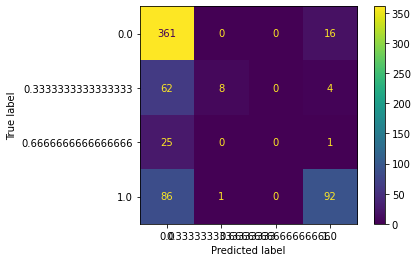

In [103]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svm_predict2)

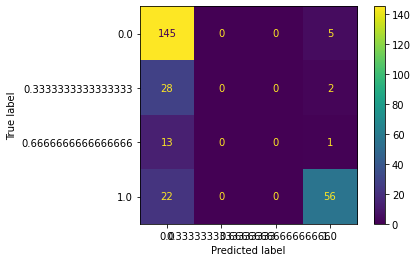

In [104]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, svm_predict_mono2)

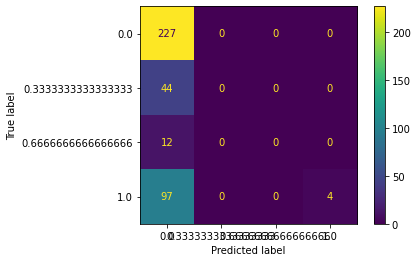

In [105]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, svm_predict_poly2)

# train model with oversampling 

In [106]:
from imblearn.over_sampling import SMOTE, SVMSMOTE, BorderlineSMOTE

In [107]:
x_resampled1, y_resampled1 = SMOTE().fit_resample(x_train_reshape, y_train)

In [108]:
x_resampled2, y_resampled2 = SVMSMOTE().fit_resample(x_train_reshape, y_train)

In [109]:
x_resampled3, y_resampled3 = BorderlineSMOTE().fit_resample(x_train_reshape, y_train)

### SMOTE Oversampling

In [110]:
svm_clf3 = svm.SVC(decision_function_shape='ovr')
svm_clf3.fit(x_resampled1, y_resampled1)
svm_predict3 = svm_clf3.predict(x_test_reshape)
svm_result3 = metrics.classification_report(y_test, svm_predict3)
svm_confusion_matrix3 = metrics.confusion_matrix(y_test, svm_predict3)
print(svm_result3)
print("svm_confusion_matrix3")
print(svm_confusion_matrix3)

                    precision    recall  f1-score   support

               0.0       0.72      0.85      0.78       377
0.3333333333333333       0.31      0.11      0.16        74
0.6666666666666666       0.11      0.08      0.09        26
               1.0       0.66      0.61      0.63       179

          accuracy                           0.67       656
         macro avg       0.45      0.41      0.41       656
      weighted avg       0.63      0.67      0.64       656

svm_confusion_matrix3
[[319   9   8  41]
 [ 52   8   2  12]
 [ 20   0   2   4]
 [ 55   9   6 109]]


In [111]:
svm_predict_mono3 = svm_clf3.predict(x_test_mono_reshape)
svm_result_mono3 = metrics.classification_report(y_test_mono, svm_predict_mono3)
svm_confusion_matrix_mono3 = metrics.confusion_matrix(y_test_mono, svm_predict_mono3)
print(svm_result_mono3)
print("svm_confusion_matrix_mono3")
print(svm_confusion_matrix_mono3)

                    precision    recall  f1-score   support

               0.0       0.71      0.92      0.80       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.12      0.14      0.13        14
               1.0       0.87      0.68      0.76        78

          accuracy                           0.71       272
         macro avg       0.43      0.44      0.42       272
      weighted avg       0.65      0.71      0.67       272

svm_confusion_matrix_mono3
[[138   0   8   4]
 [ 24   0   2   4]
 [ 12   0   2   0]
 [ 21   0   4  53]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
svm_predict_poly3 = svm_clf3.predict(x_test_poly_reshape)
svm_result_poly3 = metrics.classification_report(y_test_poly, svm_predict_poly3)
svm_confusion_matrix_poly3 = metrics.confusion_matrix(y_test_poly, svm_predict_poly3)
print(svm_result_poly3)
print("svm_confusion_matrix_poly3")
print(svm_confusion_matrix_poly3)

                    precision    recall  f1-score   support

               0.0       0.72      0.80      0.76       227
0.3333333333333333       0.31      0.18      0.23        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.53      0.55      0.54       101

          accuracy                           0.64       384
         macro avg       0.39      0.38      0.38       384
      weighted avg       0.60      0.64      0.62       384

svm_confusion_matrix_poly3
[[181   9   0  37]
 [ 28   8   0   8]
 [  8   0   0   4]
 [ 34   9   2  56]]


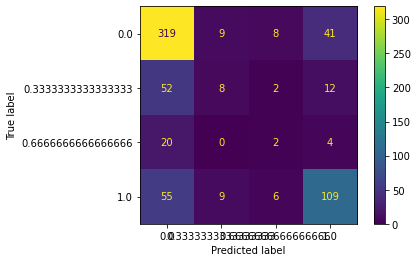

In [113]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svm_predict3)

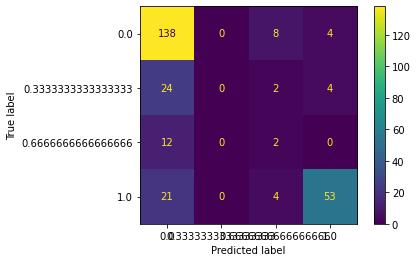

In [114]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, svm_predict_mono3)

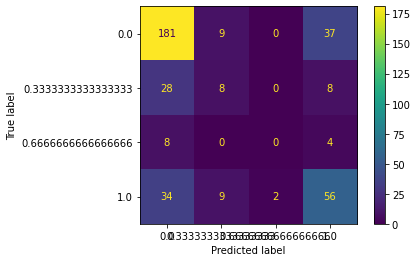

In [115]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, svm_predict_poly3)

### SVMSMOTE Oversampling  

In [116]:
svm_clf4 = svm.SVC(decision_function_shape='ovr')
svm_clf4.fit(x_resampled2, y_resampled2)
svm_predict4 = svm_clf4.predict(x_test_reshape)
svm_result4 = metrics.classification_report(y_test, svm_predict4)
svm_confusion_matrix4 = metrics.confusion_matrix(y_test, svm_predict4)
print(svm_result4)
print("svm_confusion_matrix4")
print(svm_confusion_matrix4)

                    precision    recall  f1-score   support

               0.0       0.73      0.80      0.77       377
0.3333333333333333       0.30      0.27      0.28        74
0.6666666666666666       0.25      0.12      0.16        26
               1.0       0.65      0.59      0.62       179

          accuracy                           0.66       656
         macro avg       0.48      0.45      0.46       656
      weighted avg       0.64      0.66      0.65       656

svm_confusion_matrix4
[[303  29   3  42]
 [ 40  20   2  12]
 [ 19   1   3   3]
 [ 52  17   4 106]]


In [117]:
svm_predict_mono4 = svm_clf4.predict(x_test_mono_reshape)
svm_result_mono4 = metrics.classification_report(y_test_mono, svm_predict_mono4)
svm_confusion_matrix_mono4 = metrics.confusion_matrix(y_test_mono, svm_predict_mono4)
print(svm_result_mono4)
print("svm_confusion_matrix_mono4")
print(svm_confusion_matrix_mono4)

                    precision    recall  f1-score   support

               0.0       0.72      0.80      0.76       150
0.3333333333333333       0.28      0.27      0.27        30
0.6666666666666666       0.25      0.21      0.23        14
               1.0       0.83      0.68      0.75        78

          accuracy                           0.68       272
         macro avg       0.52      0.49      0.50       272
      weighted avg       0.68      0.68      0.67       272

svm_confusion_matrix_mono4
[[120  19   3   8]
 [ 17   8   2   3]
 [ 10   1   3   0]
 [ 20   1   4  53]]


In [118]:
svm_predict_poly4 = svm_clf4.predict(x_test_poly_reshape)
svm_result_poly4 = metrics.classification_report(y_test_poly, svm_predict_poly4)
svm_confusion_matrix_poly4 = metrics.confusion_matrix(y_test_poly, svm_predict_poly4)
print(svm_result_poly4)
print("svm_confusion_matrix_poly4")
print(svm_confusion_matrix_poly4)

                    precision    recall  f1-score   support

               0.0       0.74      0.81      0.77       227
0.3333333333333333       0.32      0.27      0.29        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.54      0.52      0.53       101

          accuracy                           0.65       384
         macro avg       0.40      0.40      0.40       384
      weighted avg       0.61      0.65      0.63       384

svm_confusion_matrix_poly4
[[183  10   0  34]
 [ 23  12   0   9]
 [  9   0   0   3]
 [ 32  16   0  53]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


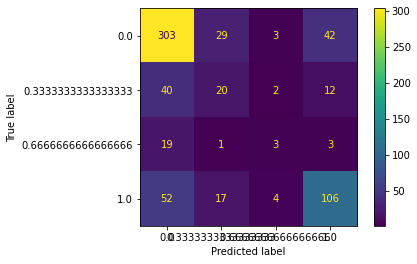

In [119]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svm_predict4)

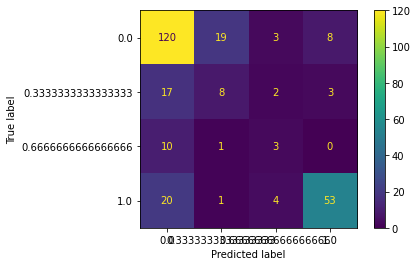

In [120]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, svm_predict_mono4)

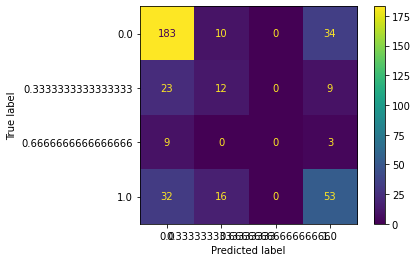

In [121]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, svm_predict_poly4)

### BorderlineSMOTE Oversampling 

In [122]:
svm_clf5 = svm.SVC(decision_function_shape='ovr')
svm_clf5.fit(x_resampled3, y_resampled3)
svm_predict5 = svm_clf5.predict(x_test_reshape)
svm_result5 = metrics.classification_report(y_test, svm_predict5)
svm_confusion_matrix5 = metrics.confusion_matrix(y_test, svm_predict5)
print(svm_result5)
print("svm_confusion_matrix5")
print(svm_confusion_matrix5)

                    precision    recall  f1-score   support

               0.0       0.75      0.81      0.78       377
0.3333333333333333       0.35      0.18      0.23        74
0.6666666666666666       0.19      0.31      0.23        26
               1.0       0.64      0.61      0.63       179

          accuracy                           0.66       656
         macro avg       0.48      0.48      0.47       656
      weighted avg       0.65      0.66      0.65       656

svm_confusion_matrix5
[[305   9  19  44]
 [ 42  13   7  12]
 [ 14   0   8   4]
 [ 46  15   9 109]]


In [123]:
svm_predict_mono5 = svm_clf5.predict(x_test_mono_reshape)
svm_result_mono5 = metrics.classification_report(y_test_mono, svm_predict_mono5)
svm_confusion_matrix_mono5 = metrics.confusion_matrix(y_test_mono, svm_predict_mono5)
print(svm_result_mono5)
print("svm_confusion_matrix_mono5")
print(svm_confusion_matrix_mono5)

                    precision    recall  f1-score   support

               0.0       0.76      0.83      0.79       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.19      0.57      0.29        14
               1.0       0.83      0.71      0.76        78

          accuracy                           0.69       272
         macro avg       0.44      0.53      0.46       272
      weighted avg       0.67      0.69      0.67       272

svm_confusion_matrix_mono5
[[124   0  19   7]
 [ 19   0   7   4]
 [  6   0   8   0]
 [ 15   0   8  55]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
svm_predict_poly5 = svm_clf5.predict(x_test_poly_reshape)
svm_result_poly5 = metrics.classification_report(y_test_poly, svm_predict_poly5)
svm_confusion_matrix_poly5 = metrics.confusion_matrix(y_test_poly, svm_predict_poly5)
print(svm_result_poly5)
print("svm_confusion_matrix_poly5")
print(svm_confusion_matrix_poly5)

                    precision    recall  f1-score   support

               0.0       0.74      0.80      0.77       227
0.3333333333333333       0.35      0.30      0.32        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.52      0.53      0.53       101

          accuracy                           0.65       384
         macro avg       0.41      0.41      0.41       384
      weighted avg       0.62      0.65      0.63       384

svm_confusion_matrix_poly5
[[181   9   0  37]
 [ 23  13   0   8]
 [  8   0   0   4]
 [ 31  15   1  54]]


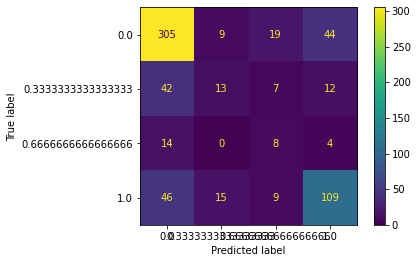

In [125]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svm_predict5)

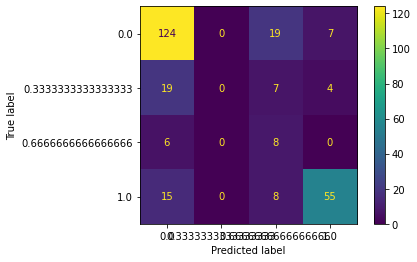

In [126]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, svm_predict_mono5)

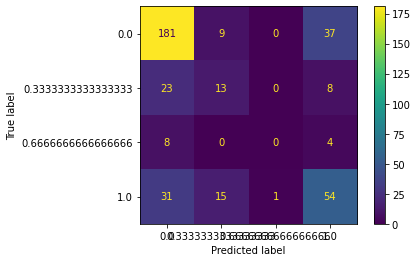

In [127]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, svm_predict_poly5)

# train model with oversampling + thresholding

In [128]:
x_resampled4, y_resampled4 = SMOTE().fit_resample(x_train_reshape_th, y_train)

In [129]:
svm_clf6 = svm.SVC(decision_function_shape='ovr')
svm_clf6.fit(x_resampled4, y_resampled4)
svm_predict6 = svm_clf6.predict(x_test_reshape_th)
svm_result6 = metrics.classification_report(y_test, svm_predict6)
svm_confusion_matrix6 = metrics.confusion_matrix(y_test, svm_predict6)
print(svm_result6)
print("svm_confusion_matrix6")
print(svm_confusion_matrix6)

                    precision    recall  f1-score   support

               0.0       0.78      0.66      0.71       377
0.3333333333333333       0.32      0.42      0.36        74
0.6666666666666666       0.13      0.27      0.17        26
               1.0       0.67      0.68      0.67       179

          accuracy                           0.62       656
         macro avg       0.47      0.51      0.48       656
      weighted avg       0.67      0.62      0.64       656

svm_confusion_matrix6
[[249  50  33  45]
 [ 27  31   6  10]
 [  8   5   7   6]
 [ 37  11   9 122]]


In [130]:
svm_predict_mono6 = svm_clf6.predict(x_test_mono_reshape_th)
svm_result_mono6 = metrics.classification_report(y_test_mono, svm_predict_mono6)
svm_confusion_matrix_mono6 = metrics.confusion_matrix(y_test_mono, svm_predict_mono6)
print(svm_result_mono6)
print("svm_confusion_matrix_mono6")
print(svm_confusion_matrix_mono6)

                    precision    recall  f1-score   support

               0.0       0.81      0.59      0.68       150
0.3333333333333333       0.22      0.37      0.27        30
0.6666666666666666       0.15      0.50      0.23        14
               1.0       0.89      0.74      0.81        78

          accuracy                           0.61       272
         macro avg       0.52      0.55      0.50       272
      weighted avg       0.73      0.61      0.65       272

svm_confusion_matrix_mono6
[[89 31 26  4]
 [11 11  6  2]
 [ 2  4  7  1]
 [ 8  4  8 58]]


In [131]:
svm_predict_poly6 = svm_clf6.predict(x_test_poly_reshape_th)
svm_result_poly6 = metrics.classification_report(y_test_poly, svm_predict_poly6)
svm_confusion_matrix_poly6 = metrics.confusion_matrix(y_test_poly, svm_predict_poly6)
print(svm_result_poly6)
print("svm_confusion_matrix_poly6")
print(svm_confusion_matrix_poly6)

                    precision    recall  f1-score   support

               0.0       0.76      0.70      0.73       227
0.3333333333333333       0.43      0.45      0.44        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       0.54      0.63      0.58       101

          accuracy                           0.64       384
         macro avg       0.43      0.45      0.44       384
      weighted avg       0.64      0.64      0.64       384

svm_confusion_matrix_poly6
[[160  19   7  41]
 [ 16  20   0   8]
 [  6   1   0   5]
 [ 29   7   1  64]]


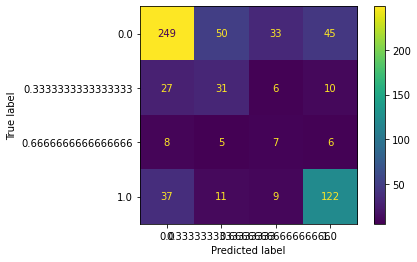

In [132]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svm_predict6)

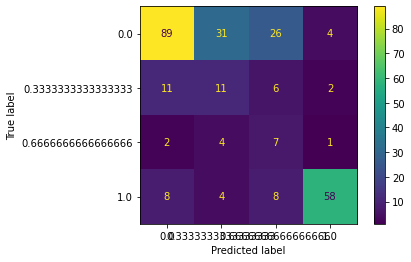

In [133]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, svm_predict_mono6)

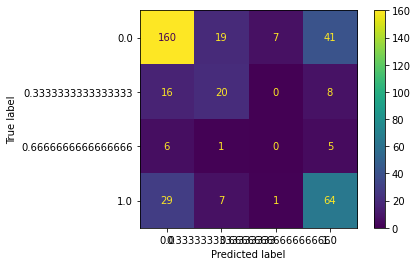

In [134]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, svm_predict_poly6)

# train model with prameter tuning 

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
# too many parameters in gridseaech will end up with runing forever - GPU might be able to accelerate the computing
# svc = svm.SVC(decision_function_shape='ovr')
# parameters = [
#     {
#         'C': [1,3,5,6,9,11,13,15,17,19],
#         'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# #         'kernel':['rbf']
#     }
# #     {
# #         'C': [1,3,5,6,9,11,13,15,17,19],
# #         'kernel':['linear']
# #     }
# ]

In [137]:
# limited the parameter volume in gridsearch
svc = svm.SVC(decision_function_shape='ovr')
parameters = [
    {
        'C': [0.1, 1],
        'gamma':[0.1, 1],
        'kernel':['rbf']
    }

]

In [138]:
# output of model training with gridsearch
clf = GridSearchCV(svc,parameters, cv=2, n_jobs=8)
clf.fit(x_resampled4, y_resampled4)
print(clf.best_params_)
best_model = clf.best_estimator_
svm_predict = best_model.predict(x_test_reshape_th)
svm_result = metrics.classification_report(y_test, svm_predict)
svm_confusion_matrix = metrics.confusion_matrix(y_test, svm_predict)
print(svm_result)
print("svm_confusion_matrix")
print(svm_confusion_matrix)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
                    precision    recall  f1-score   support

               0.0       0.58      1.00      0.73       377
0.3333333333333333       0.00      0.00      0.00        74
0.6666666666666666       0.00      0.00      0.00        26
               1.0       1.00      0.01      0.02       179

          accuracy                           0.58       656
         macro avg       0.39      0.25      0.19       656
      weighted avg       0.60      0.58      0.43       656

svm_confusion_matrix
[[377   0   0   0]
 [ 74   0   0   0]
 [ 26   0   0   0]
 [177   0   0   2]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
svm_predict_mono7 = best_model.predict(x_test_mono_reshape_th)
svm_result_mono7 = metrics.classification_report(y_test_mono, svm_predict_mono7)
svm_confusion_matrix_mono7 = metrics.confusion_matrix(y_test_mono, svm_predict_mono7)
print(svm_result_mono7)
print("svm_confusion_matrix_mono7")
print(svm_confusion_matrix_mono7)

                    precision    recall  f1-score   support

               0.0       0.55      1.00      0.71       150
0.3333333333333333       0.00      0.00      0.00        30
0.6666666666666666       0.00      0.00      0.00        14
               1.0       0.00      0.00      0.00        78

          accuracy                           0.55       272
         macro avg       0.14      0.25      0.18       272
      weighted avg       0.30      0.55      0.39       272

svm_confusion_matrix_mono7
[[150   0   0   0]
 [ 30   0   0   0]
 [ 14   0   0   0]
 [ 78   0   0   0]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
svm_predict_poly7 = best_model.predict(x_test_poly_reshape_th)
svm_result_poly7 = metrics.classification_report(y_test_poly, svm_predict_poly7)
svm_confusion_matrix_poly7 = metrics.confusion_matrix(y_test_poly, svm_predict_poly7)
print(svm_result_poly7)
print("svm_confusion_matrix_poly7")
print(svm_confusion_matrix_poly7)

                    precision    recall  f1-score   support

               0.0       0.59      1.00      0.75       227
0.3333333333333333       0.00      0.00      0.00        44
0.6666666666666666       0.00      0.00      0.00        12
               1.0       1.00      0.02      0.04       101

          accuracy                           0.60       384
         macro avg       0.40      0.25      0.20       384
      weighted avg       0.61      0.60      0.45       384

svm_confusion_matrix_poly7
[[227   0   0   0]
 [ 44   0   0   0]
 [ 12   0   0   0]
 [ 99   0   0   2]]


C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


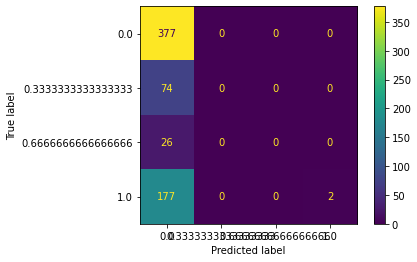

In [145]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, svm_predict)

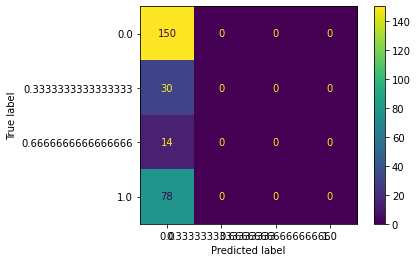

In [146]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mono, svm_predict_mono7)

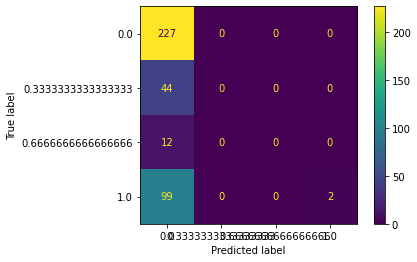

In [147]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_poly, svm_predict_poly7)